### Task 1: Machine Learning - Clustering
1. Task: Use any clustering technique to extract patterns or segregate data into groups.
2. User Story: User should be able to provide a data point (a row) and program should be able to identify to which cluster given data point belongs to and why?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train=pd.read_excel('/home/ganesh/Projects/ResoluteAI/Project1/Data/train.xlsx')
train

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2


In [3]:
train.isnull().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

In [4]:
train.isna().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

In [5]:
test=pd.read_excel('/home/ganesh/Projects/ResoluteAI/Project1/Data/test.xlsx')
test

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [7]:
train.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


In [8]:
train1=train.drop(['target'],axis=1)
train1

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81


In [9]:
cor=train1.corr()
cor

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
T1,1.000000,0.560216,0.311714,0.278678,0.030729,-0.019021,-0.189917,-0.326555,-0.276807,0.632505,0.637967,0.553026,0.173900,-0.065384,-0.096099,-0.241617,-0.293170,-0.299539
T2,0.560216,1.000000,0.410851,0.282936,0.020739,0.020940,-0.204633,-0.317390,-0.286338,0.582582,0.548041,0.442207,0.283176,-0.045170,-0.178599,-0.239609,-0.335028,-0.357750
T3,0.311714,0.410851,1.000000,0.456973,0.260740,0.115295,-0.098229,-0.134013,-0.141219,0.325326,0.391924,0.450689,0.348083,0.098260,0.118867,-0.092029,-0.170626,-0.139297
T4,0.278678,0.282936,0.456973,1.000000,0.477502,0.280992,0.034588,0.050852,0.039693,0.239214,0.347544,0.472972,0.488962,0.259860,0.243707,0.046638,-0.024625,-0.072776
T5,0.030729,0.020739,0.260740,0.477502,1.000000,0.433562,0.331709,0.329899,0.235421,-0.007599,0.119892,0.173502,0.405846,0.501728,0.427715,0.257249,0.222973,0.184738
T6,-0.019021,0.020940,0.115295,0.280992,0.433562,1.000000,0.330784,0.237259,0.168575,0.142028,0.127816,0.253818,0.470575,0.442158,0.519866,0.410310,0.269987,0.241012
T7,-0.189917,-0.204633,-0.098229,0.034588,0.331709,0.330784,1.000000,0.582374,0.509879,-0.257658,-0.225092,-0.182301,0.127775,0.587982,0.432985,0.530754,0.504457,0.511568
T8,-0.326555,-0.317390,-0.134013,0.050852,0.329899,0.237259,0.582374,1.000000,0.737602,-0.329384,-0.254751,-0.201630,-0.003733,0.535952,0.372510,0.564662,0.696909,0.697222
T9,-0.276807,-0.286338,-0.141219,0.039693,0.235421,0.168575,0.509879,0.737602,1.000000,-0.341653,-0.261706,-0.194367,-0.094502,0.454235,0.271837,0.508219,0.652336,0.735444
T10,0.632505,0.582582,0.325326,0.239214,-0.007599,0.142028,-0.257658,-0.329384,-0.341653,1.000000,0.699949,0.630452,0.258537,-0.093976,-0.045210,-0.191623,-0.234558,-0.317700


<Axes: >

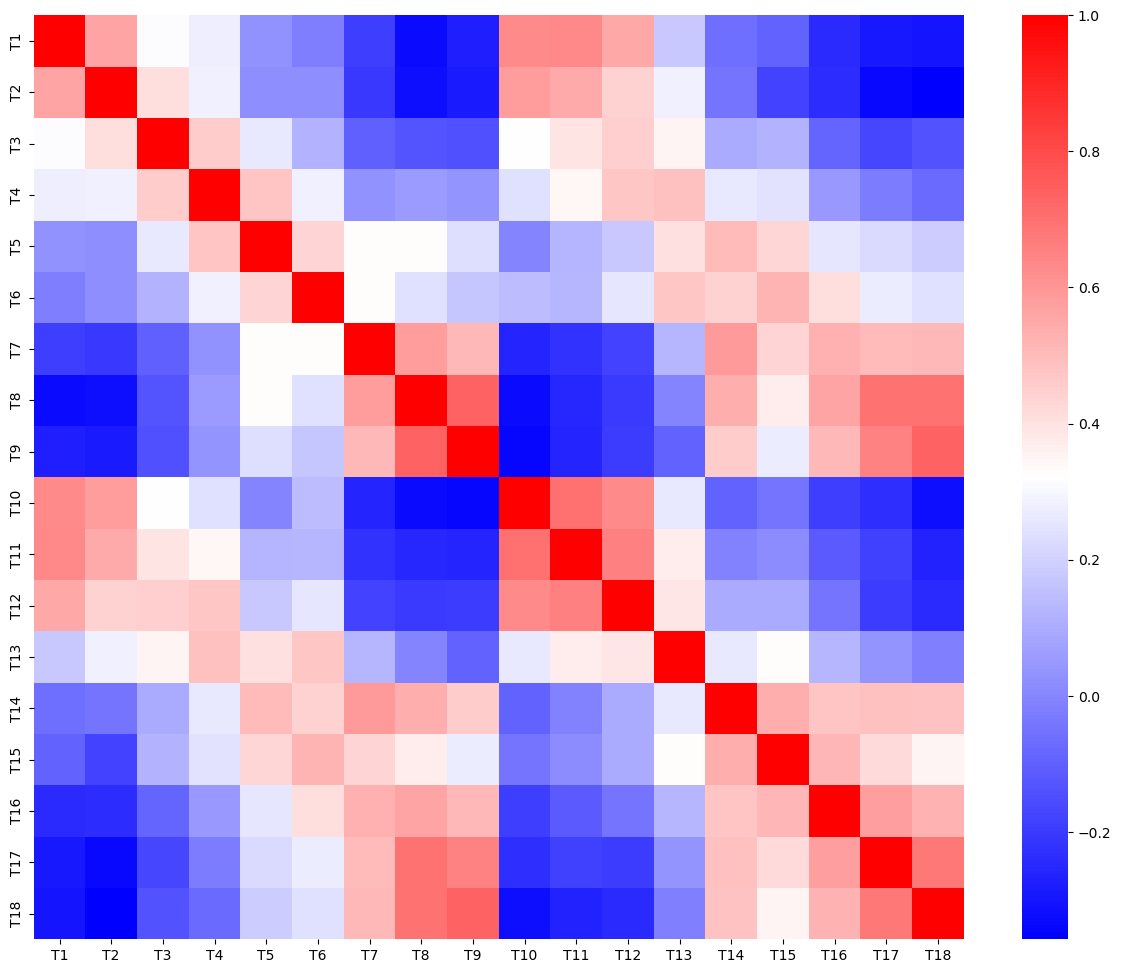

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(cor,cmap=plt.cm.bwr)

In [11]:
#sns.pairplot(train,hue='target')

<Axes: xlabel='T1', ylabel='T2'>

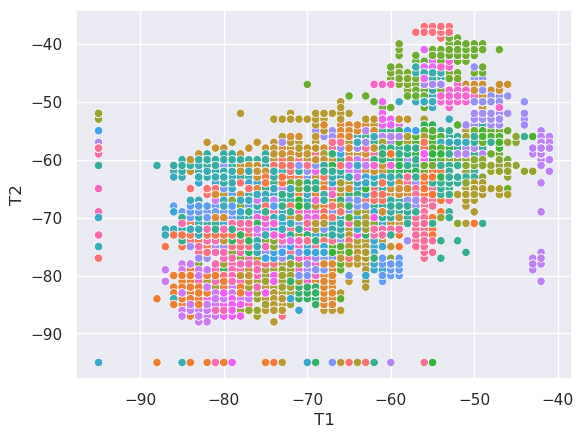

In [12]:
sns.set_theme()
sns.scatterplot(data=train,x='T1',y='T2', hue='target',legend=False)

## Nominal or Ordinal Category

In [13]:
target=train['target']
target

0        B37
1        B61
2        A19
3        A22
4        A33
        ... 
36747    B34
36748    B15
36749     A6
36750     B2
36751    B45
Name: target, Length: 36752, dtype: object

In [14]:
unique_target=target.unique()
print(len(unique_target))
unique_target

160


array(['B37', 'B61', 'A19', 'A22', 'A33', 'A75', 'A41', 'B14', 'B80',
       'B64', 'A1', 'B21', 'A70', 'B57', 'B9', 'B50', 'B31', 'A21', 'B30',
       'A4', 'B40', 'B6', 'A64', 'A25', 'B18', 'A66', 'A53', 'B73', 'A50',
       'B25', 'A29', 'A35', 'A3', 'A46', 'B45', 'A36', 'B5', 'A79', 'A32',
       'B23', 'A7', 'A62', 'A71', 'A58', 'A9', 'B63', 'B51', 'B8', 'B36',
       'A14', 'A15', 'A24', 'B38', 'A10', 'B4', 'A37', 'A12', 'B41',
       'A17', 'B49', 'B71', 'B59', 'B39', 'B29', 'A76', 'B58', 'B28',
       'A77', 'A67', 'B24', 'A31', 'A34', 'A5', 'B34', 'A11', 'B16',
       'B20', 'A63', 'B53', 'A73', 'A44', 'A69', 'A56', 'A54', 'A55',
       'B11', 'A42', 'B22', 'B67', 'A74', 'A57', 'A8', 'B46', 'B15',
       'A51', 'A40', 'A59', 'A72', 'B32', 'A2', 'A13', 'B17', 'A65',
       'A52', 'A47', 'B47', 'B77', 'B3', 'B35', 'B44', 'A80', 'B43',
       'B54', 'B75', 'A49', 'B52', 'B33', 'B2', 'B1', 'A39', 'B7', 'A20',
       'A18', 'B12', 'A27', 'A6', 'A68', 'B72', 'B66', 'B69', 'A26',
   

In [15]:
A=[]
B=[]
for i in unique_target:
    
    if i[0]=='A':
        A.append(i)
    else:
        B.append(i)
        
print(len(A),A)
print()
print(len(B),B)

80 ['A19', 'A22', 'A33', 'A75', 'A41', 'A1', 'A70', 'A21', 'A4', 'A64', 'A25', 'A66', 'A53', 'A50', 'A29', 'A35', 'A3', 'A46', 'A36', 'A79', 'A32', 'A7', 'A62', 'A71', 'A58', 'A9', 'A14', 'A15', 'A24', 'A10', 'A37', 'A12', 'A17', 'A76', 'A77', 'A67', 'A31', 'A34', 'A5', 'A11', 'A63', 'A73', 'A44', 'A69', 'A56', 'A54', 'A55', 'A42', 'A74', 'A57', 'A8', 'A51', 'A40', 'A59', 'A72', 'A2', 'A13', 'A65', 'A52', 'A47', 'A80', 'A49', 'A39', 'A20', 'A18', 'A27', 'A6', 'A68', 'A26', 'A78', 'A60', 'A16', 'A45', 'A30', 'A23', 'A38', 'A48', 'A43', 'A28', 'A61']

80 ['B37', 'B61', 'B14', 'B80', 'B64', 'B21', 'B57', 'B9', 'B50', 'B31', 'B30', 'B40', 'B6', 'B18', 'B73', 'B25', 'B45', 'B5', 'B23', 'B63', 'B51', 'B8', 'B36', 'B38', 'B4', 'B41', 'B49', 'B71', 'B59', 'B39', 'B29', 'B58', 'B28', 'B24', 'B34', 'B16', 'B20', 'B53', 'B11', 'B22', 'B67', 'B46', 'B15', 'B32', 'B17', 'B47', 'B77', 'B3', 'B35', 'B44', 'B43', 'B54', 'B75', 'B52', 'B33', 'B2', 'B1', 'B7', 'B12', 'B72', 'B66', 'B69', 'B19', 'B62', '

In [16]:
target_count=target.value_counts().to_dict()
target_count

{'A39': 635,
 'A33': 633,
 'A29': 432,
 'A3': 429,
 'B45': 428,
 'A25': 427,
 'B58': 422,
 'A4': 418,
 'A14': 418,
 'A34': 418,
 'A37': 415,
 'A15': 413,
 'A21': 411,
 'A77': 241,
 'A59': 232,
 'B13': 230,
 'B51': 230,
 'B48': 229,
 'B76': 226,
 'A75': 224,
 'B47': 223,
 'B4': 223,
 'B22': 223,
 'B63': 222,
 'B7': 222,
 'B16': 221,
 'B62': 220,
 'A51': 220,
 'B21': 220,
 'A13': 219,
 'A41': 219,
 'A67': 219,
 'A48': 218,
 'B44': 218,
 'A42': 218,
 'B56': 218,
 'B53': 218,
 'B18': 217,
 'A54': 217,
 'B34': 217,
 'B42': 217,
 'A73': 217,
 'A53': 217,
 'A63': 216,
 'A76': 216,
 'B31': 216,
 'B79': 216,
 'B46': 216,
 'A7': 216,
 'A47': 216,
 'B73': 215,
 'B5': 215,
 'A43': 215,
 'B3': 215,
 'B25': 215,
 'A1': 215,
 'B71': 214,
 'B57': 214,
 'B67': 214,
 'A64': 214,
 'A74': 214,
 'B61': 214,
 'B8': 214,
 'A61': 214,
 'B33': 213,
 'A44': 213,
 'B29': 213,
 'A70': 213,
 'B28': 212,
 'B20': 212,
 'B52': 212,
 'B2': 212,
 'A57': 212,
 'B69': 212,
 'A45': 212,
 'B27': 212,
 'B35': 212,
 'A11': 2

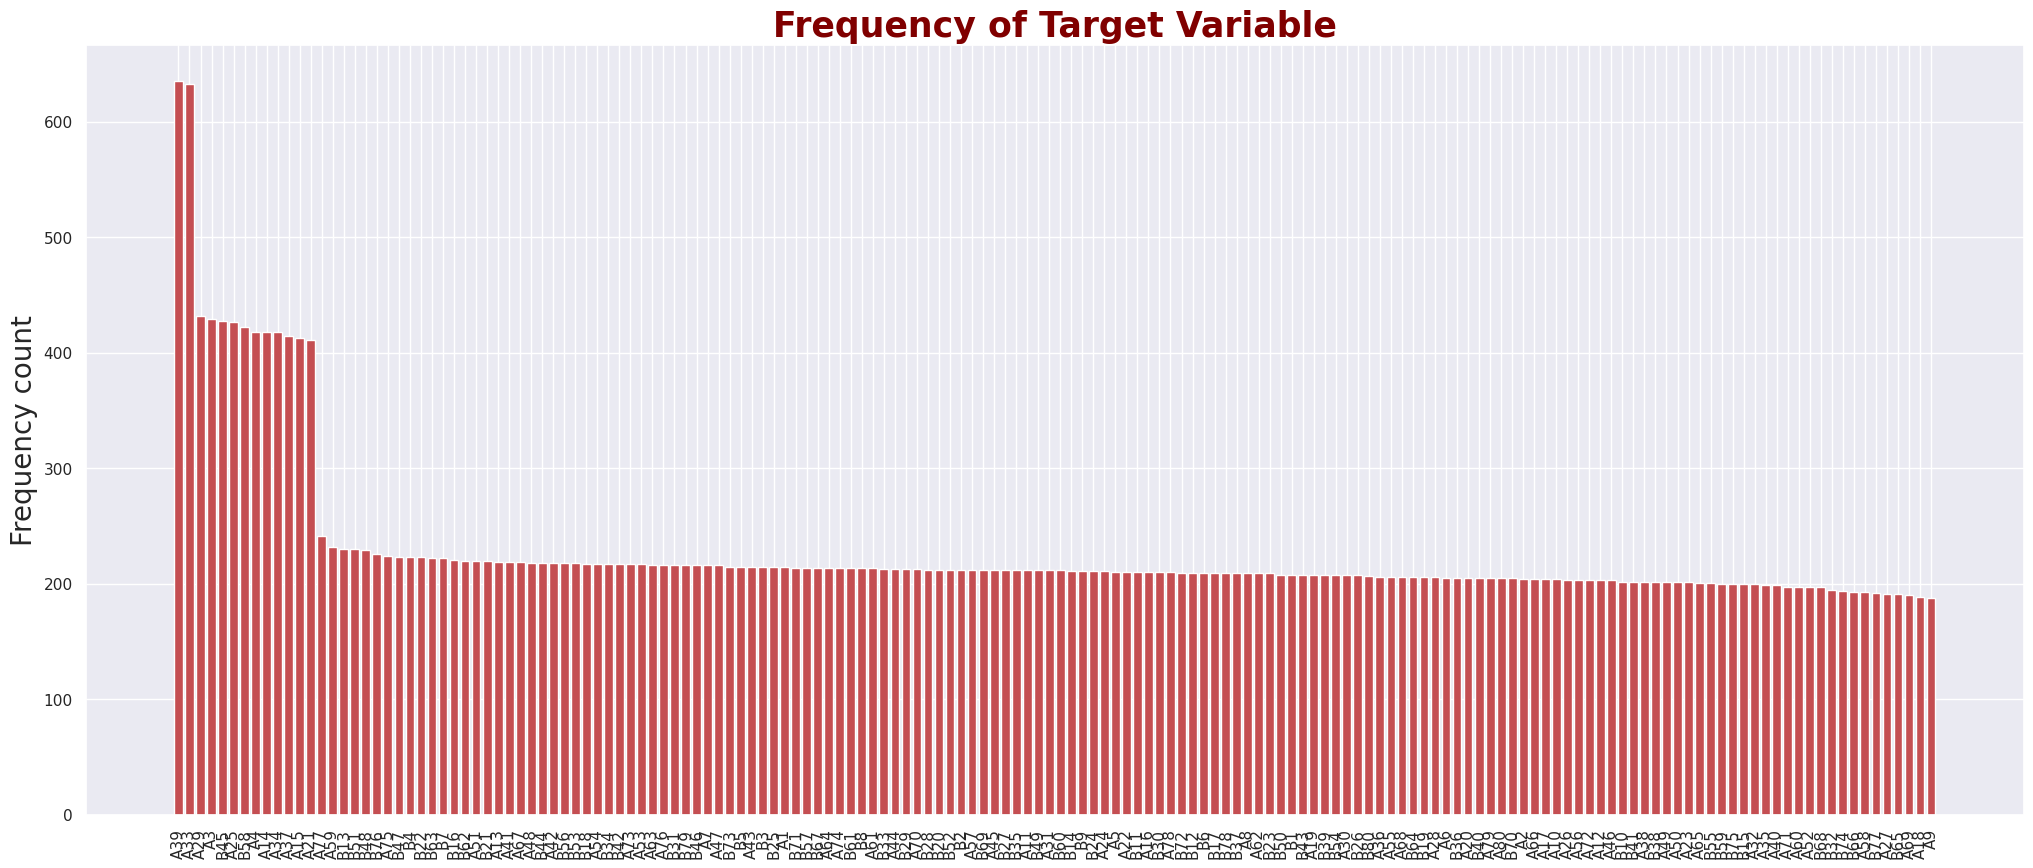

In [17]:
y = target_count.values()
x = target_count.keys()

plt.figure(figsize=(25,10))

plt.bar(x,y,color='r')
plt.title('Frequency of Target Variable',size=25,fontweight='bold',c='maroon')
plt.ylabel('Frequency count',size=20)
plt.xticks(rotation=90)

plt.show()

## Kmean Clustering
K-means is a simple and effective clustering algorithm that is widely used in a variety of applications, including data mining, machine learning, and pattern recognition.

Here are some of the advantages of K-means algorithm:

* It is a simple and easy to understand algorithm.
* It is very efficient and can be used to cluster large datasets.
* It is a robust algorithm that can handle noisy data.
* It is a versatile algorithm that can be used for a variety of clustering tasks.

Here are some of the disadvantages of K-means algorithm:

* It is sensitive to the initial choice of cluster centers.
* It can be sensitive to outliers.
* It can be computationally expensive for large datasets.
* It can be difficult to interpret the results of K-means clustering

1. Elbow method for Finding the K value.
2. validation Method : Silhouette Distance



In [18]:
from sklearn.cluster import KMeans 
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [19]:
k=[]
Inertia=[]

for i in range(2,20,2):
    #kmean=KMeans(n_clusters=i,random_state=42)
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(np.array(train1))

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(np.array(train1), cluster_labels)

    Inertia.append(clusterer.inertia_)
    k.append(i)
    
    #silhouette_avg = silhouette_score(np.array(train1), cluster_labels)
    print(
        "For clusters =",i,
        " The average silhouette_score is :",silhouette_avg)

    #Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(np.array(train1), cluster_labels)
    print('sample_silhouette_values :', sample_silhouette_values)
    

For clusters = 2  The average silhouette_score is : 0.26477715391567486
sample_silhouette_values : [0.07578486 0.41863604 0.27112224 ... 0.32449227 0.33835022 0.33984478]
For clusters = 4  The average silhouette_score is : 0.19383206449106108
sample_silhouette_values : [0.16659836 0.26883483 0.23635372 ... 0.29903158 0.17852171 0.00289009]
For clusters = 6  The average silhouette_score is : 0.19694505083351524
sample_silhouette_values : [ 0.22311555  0.27663342  0.30767359 ...  0.34195661  0.22065903
 -0.00446754]
For clusters = 8  The average silhouette_score is : 0.1686317000496654
sample_silhouette_values : [0.21942741 0.04877202 0.19212726 ... 0.14825273 0.28020837 0.0203015 ]
For clusters = 10  The average silhouette_score is : 0.1606881629049541
sample_silhouette_values : [0.13616627 0.13389174 0.2866053  ... 0.17414618 0.24497306 0.11271239]
For clusters = 12  The average silhouette_score is : 0.15344000712314526
sample_silhouette_values : [0.18641094 0.04917587 0.30928354 ... 0

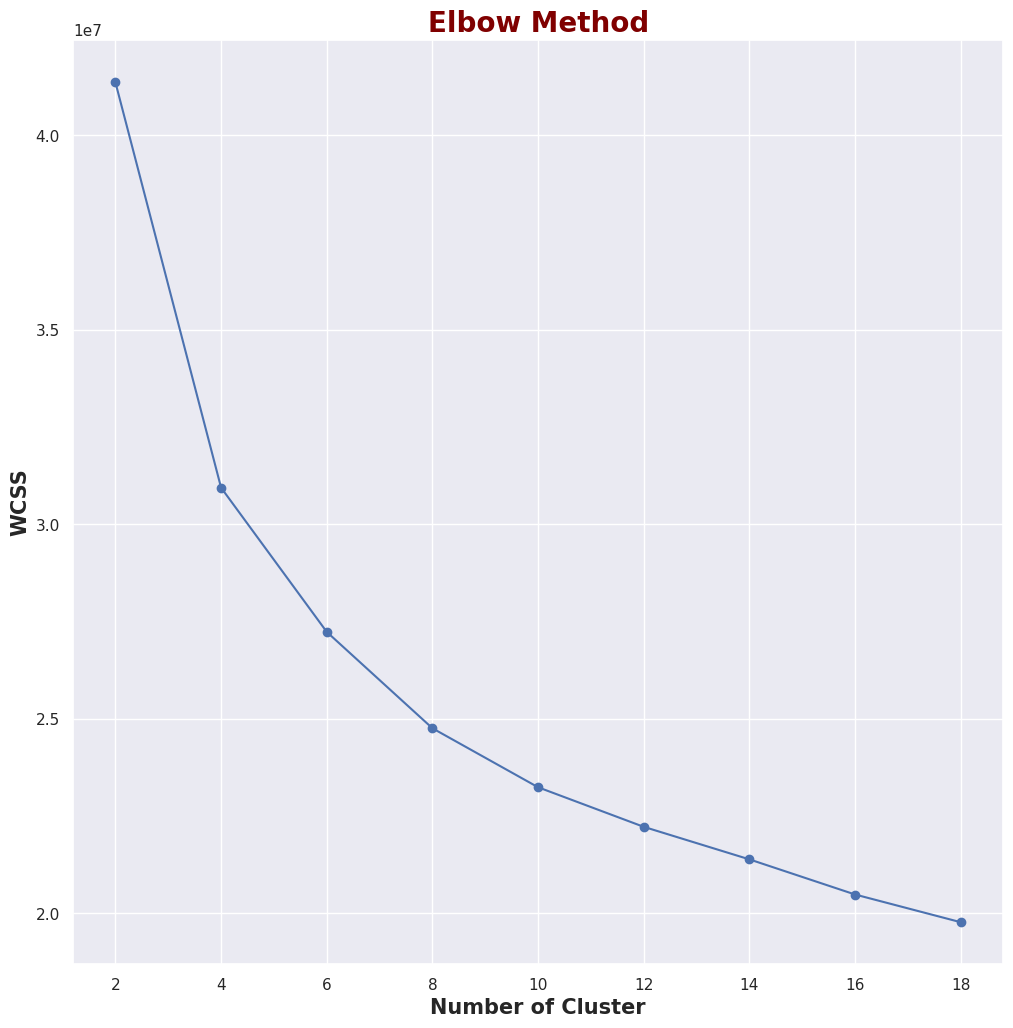

In [20]:
plt.figure(figsize=(12,12))

plt.plot(k, Inertia,marker='o')
plt.title("Elbow Method",c='maroon',size=20,fontweight="bold")
plt.xlabel("Number of Cluster",fontweight="bold",size=15)
plt.ylabel("WCSS",fontweight="bold",size=15)

plt.show()

In [23]:
KMEANS=KMeans(n_clusters=5, random_state=10)
KMEANS.fit(train1)

KMeans(n_clusters=5, random_state=10)

In [32]:
import joblib

joblib.dump(KMEANS,filename='../../Project1/Models/KMEANS.pkl')

['../../Project1/Models/KMEANS.pkl']

In [29]:
pre=KMEANS.predict([[-45, -83, -70,-44 ,-64 ,-72 ,-50 ,-69 ,-60 ,-76,-83,-78,-81 ,-37 ,-81 ,-70,-88 ,-60]])

In [30]:
pre

array([0], dtype=int32)

For n_clusters = 2 The average silhouette_score is : 0.26477715391567486
For n_clusters = 4 The average silhouette_score is : 0.19383206449106108
For n_clusters = 6 The average silhouette_score is : 0.19694505083351524
For n_clusters = 8 The average silhouette_score is : 0.1686317000496654
For n_clusters = 10 The average silhouette_score is : 0.1606881629049541
For n_clusters = 12 The average silhouette_score is : 0.15344000712314526


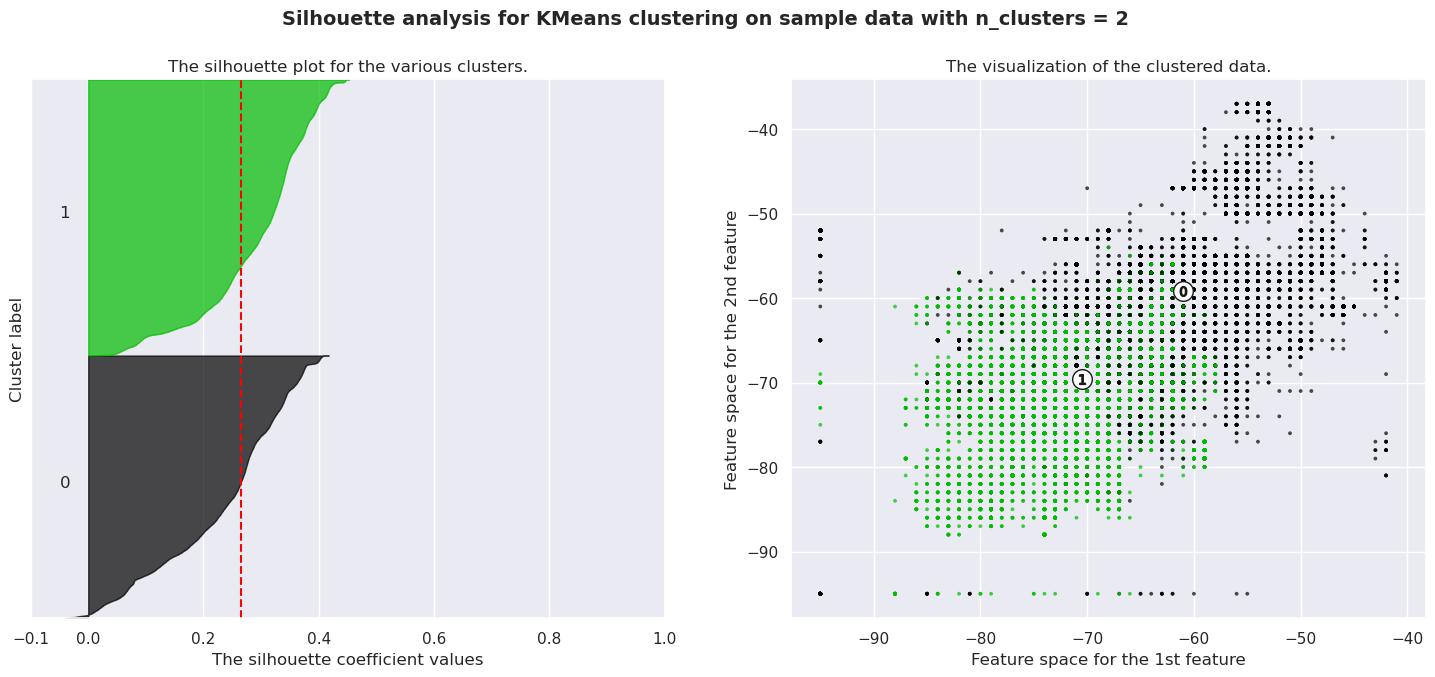

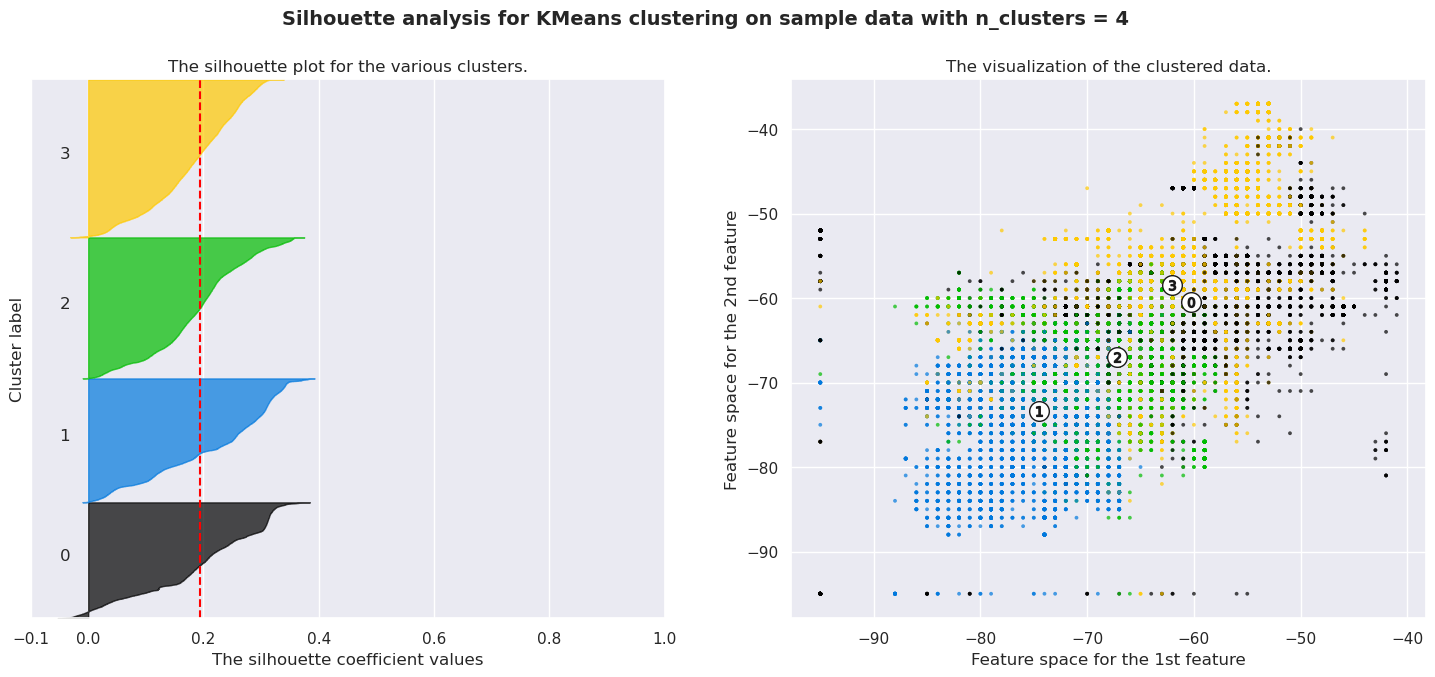

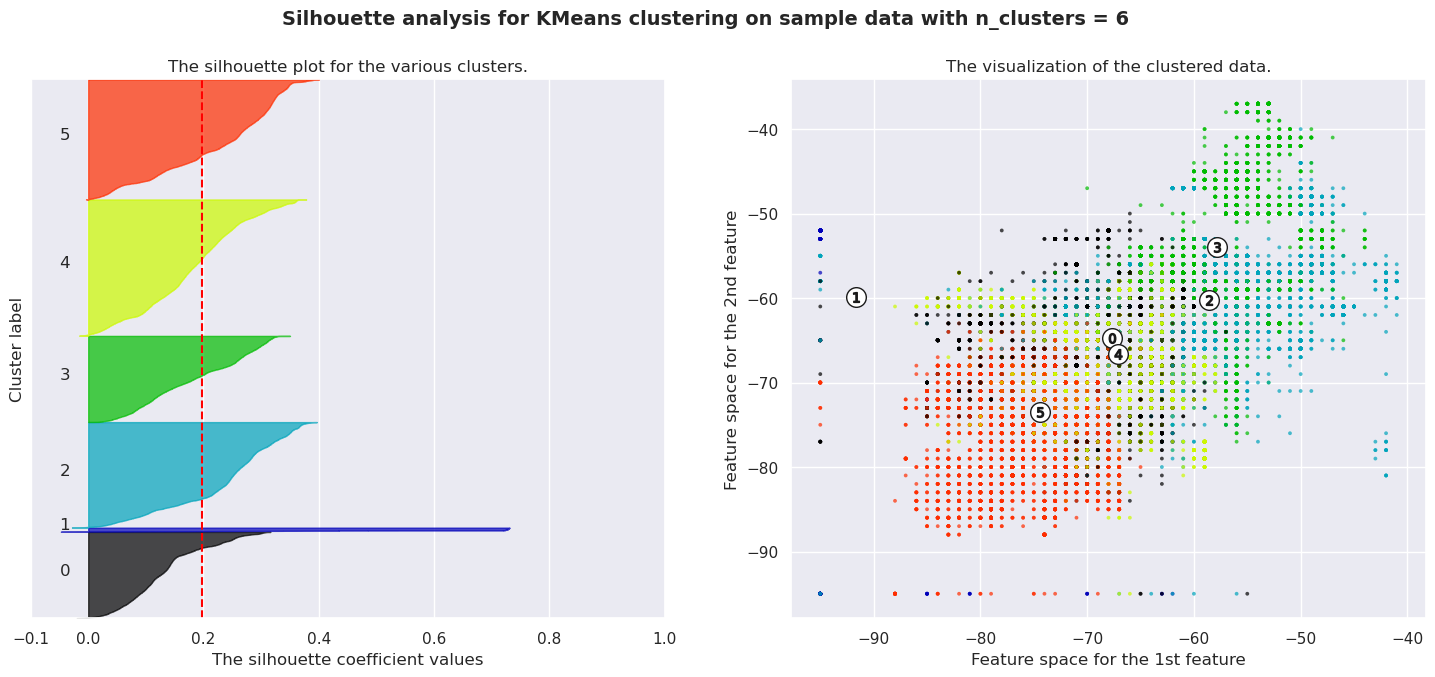

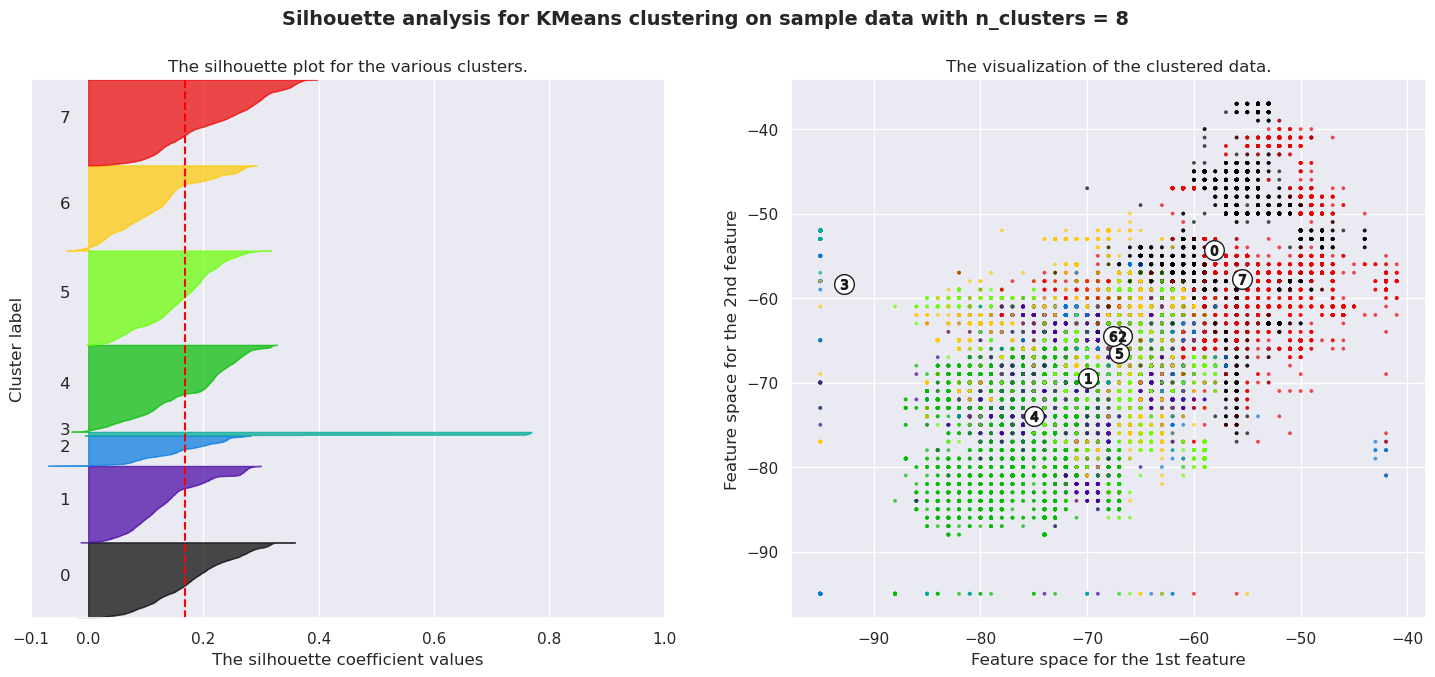

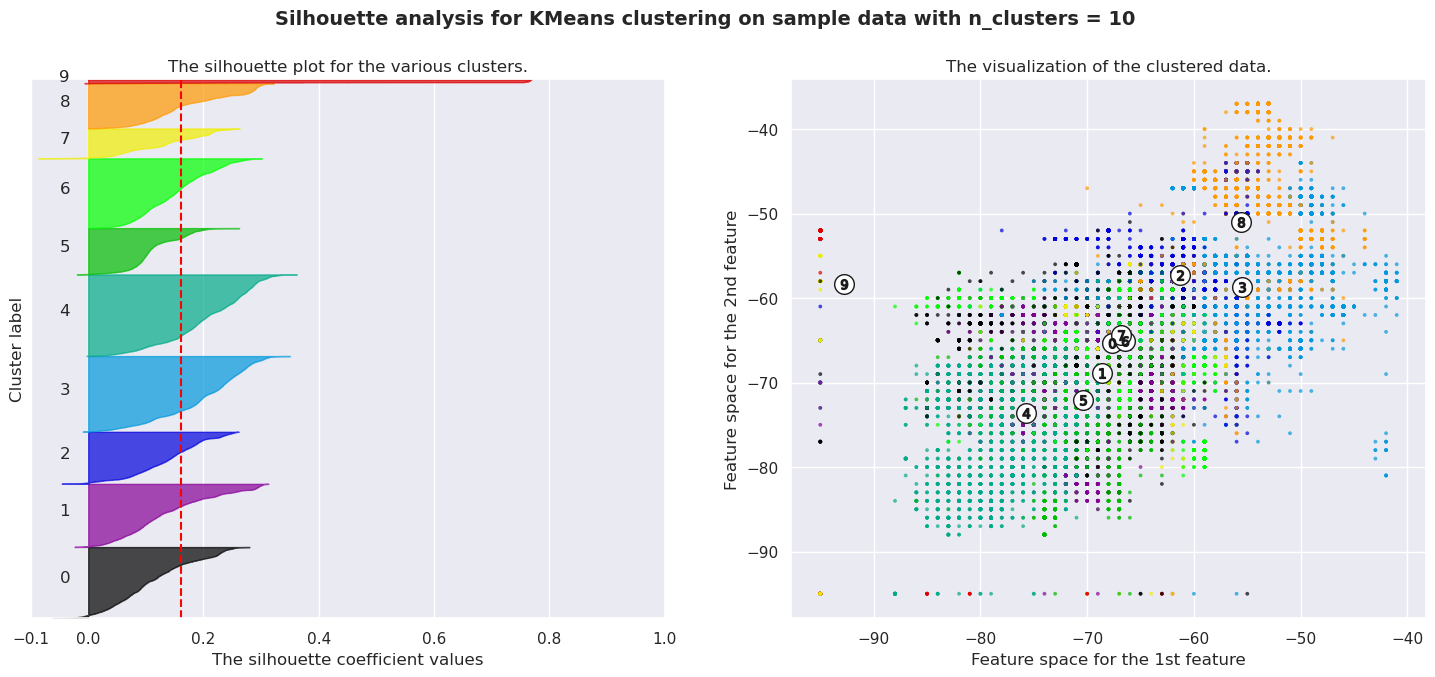

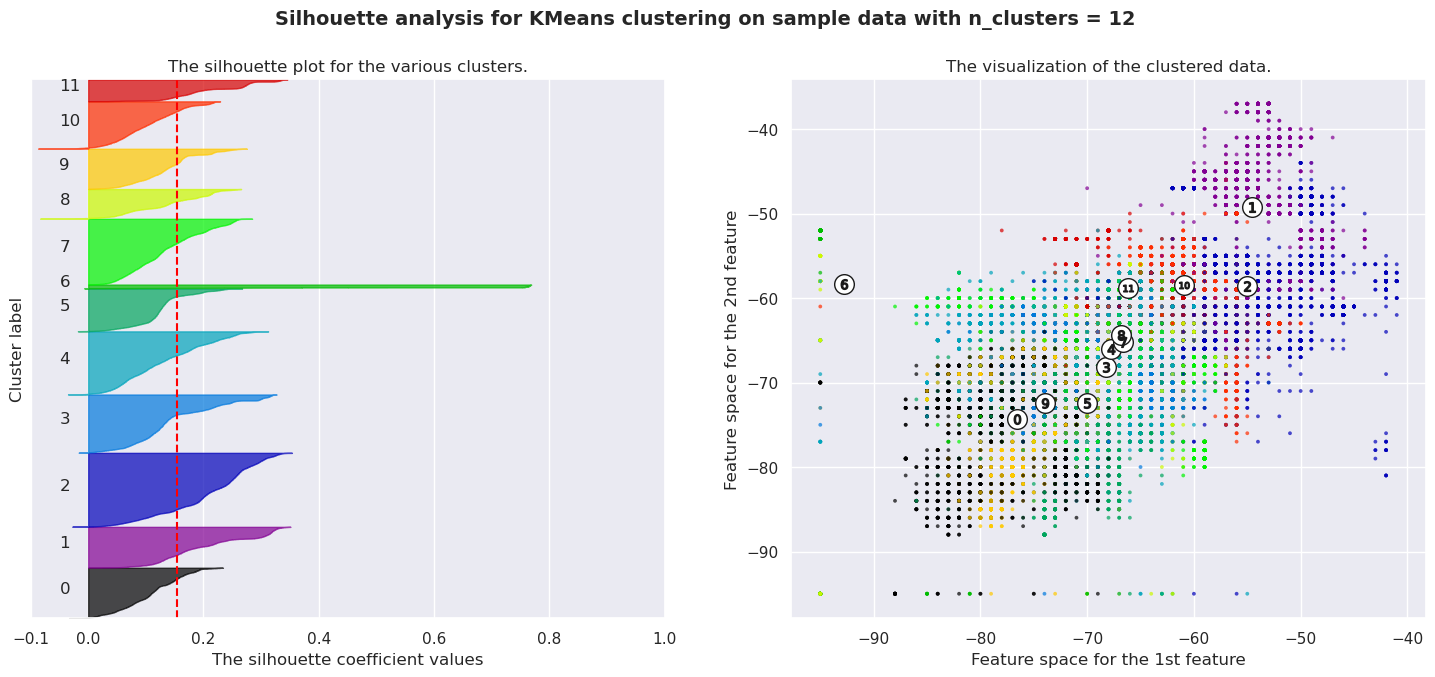

In [24]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X=np.array(train1)
range_n_clusters = [2, 4, 6, 8, 10,12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()